<a href="https://www.kaggle.com/code/kusumakar/co2-emissions-eda-and-predictions?scriptVersionId=208001697" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carbon-co2-emissions/Carbon_(CO2)_Emissions_by_Country.csv


In [2]:
df = pd.read_csv("/kaggle/input/carbon-co2-emissions/Carbon_(CO2)_Emissions_by_Country.csv")

In [3]:
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


- **Country**: The name of the country for which CO₂ emissions data is recorded. This column allows for country-specific analysis and comparison.- **Region**n: The geographical or administrative region to which each country belongs. This categorization facilitates regional analysis by grouping countries into broader areas, such as continents or economic zones
- **Date**te: The year in which the CO₂ emissions data was recorded, formatted as a date for compatibility with time-series analysis and to allow temporal trends to be identifie
- **Kilotons of CO₂**CO₂: The total amount of carbon dioxide emissions, measured in kilotons, released by each country in the specified year. This column provides a quantitative measure of national CO₂ emissio
- **Metric Tons Per Capita** pita: The per capita emissions of CO₂ for each country, expressed in metric tons. This value represents the average carbon dioxide emissions per person, offering insight into individual emissions contributions relative to population size.

# Total Rows and Column in the dataset

In [4]:
df.shape

(5677, 5)

#### There are 5,677 records and 5 features in the entire dataset

### Total Null Values

In [5]:
df.isnull().sum()

Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64

#### There are 0 null values in all the columns

### Importing data visualization libraries for exploratory data analysis

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

## Average CO2 Emissions country wise

In [7]:
df1 = df.groupby('Country').agg({"Kilotons of Co2":"mean"}).reset_index().sort_values(by='Kilotons of Co2')

<Axes: title={'center': 'Avg. CO2 Emissions Country Wise ( Top 100)'}, xlabel='Country', ylabel='Kilotons of Co2'>

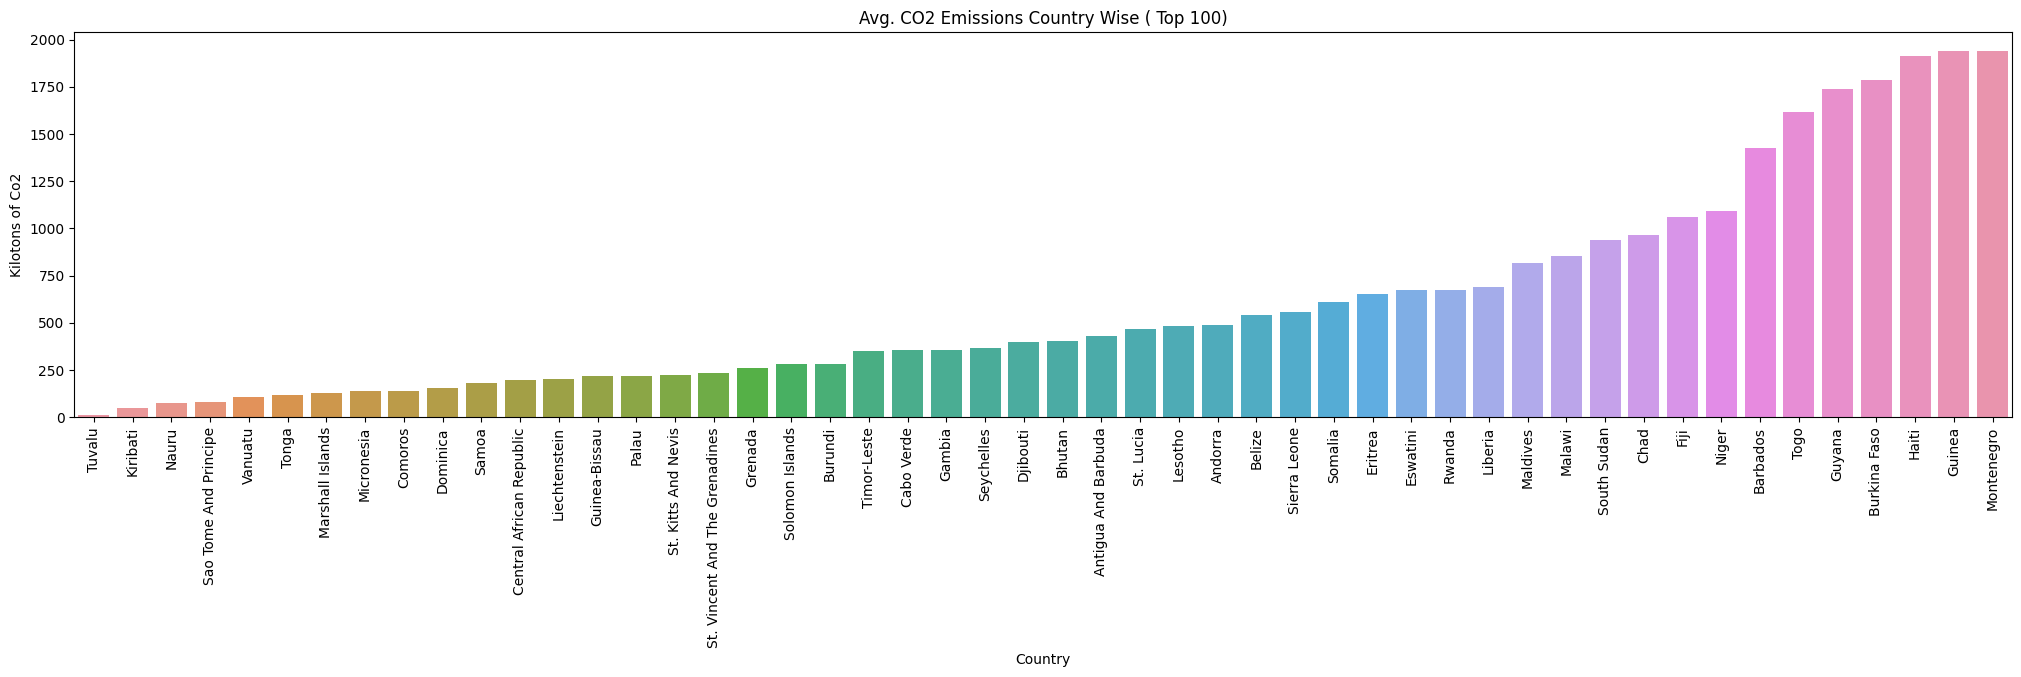

In [8]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.title("Avg. CO2 Emissions Country Wise ( Top 100)")
sns.barplot(x='Country',y='Kilotons of Co2',data=df1.head(50))

In [9]:
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


## Region Wise Distribution of CO2 Emissions

<Axes: >

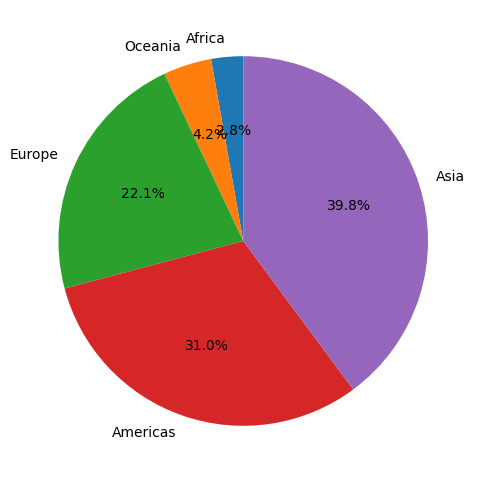

In [10]:
df1 = df.groupby('Region').agg({"Kilotons of Co2":"mean"}).reset_index().sort_values(by='Kilotons of Co2')
df1.set_index('Region')['Kilotons of Co2'].plot.pie(
    autopct='%1.1f%%',  # Display percentage
    startangle=90,      # Start angle of the pie chart
    figsize=(6, 6),     # Set the figure size
    ylabel=''           # Remove the default ylabel
)

### Co2 Emission Trend over the span of Years

- We will extract the year from Date and plot the historical trend of CO2 Emissions

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [12]:
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita,Year
0,Afghanistan,Asia,2011-01-01,8930.0,0.31,2011
1,Afghanistan,Asia,2012-01-01,8080.0,0.27,2012
2,Afghanistan,Asia,2010-01-01,7110.0,0.25,2010
3,Afghanistan,Asia,2019-01-01,6080.0,0.16,2019
4,Afghanistan,Asia,2018-01-01,6070.0,0.17,2018


In [13]:
df2= df.groupby(['Country','Year']).agg({"Metric Tons Per Capita":"mean"}).reset_index().sort_values(by='Metric Tons Per Capita',ascending=False)

In [14]:
df2.head()

,Country,Year,Metric Tons Per Capita
4083,Qatar,2004,47.65
4078,Qatar,1999,47.29
4082,Qatar,2003,46.41
4076,Qatar,1997,46.11
4077,Qatar,1998,45.61


<Axes: xlabel='Year', ylabel='Metric Tons Per Capita'>

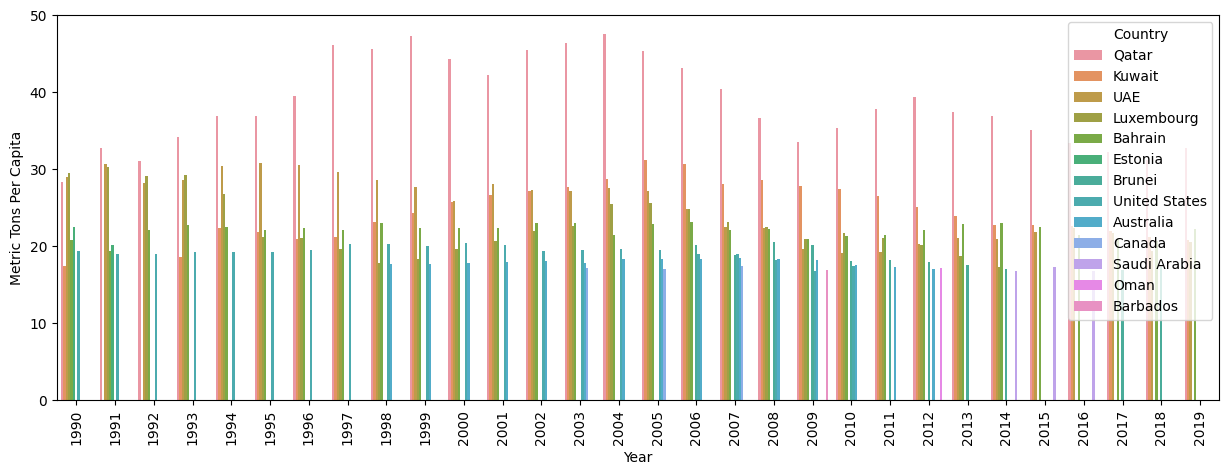

In [15]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x='Year',y='Metric Tons Per Capita', hue='Country',data=df2.head(200))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


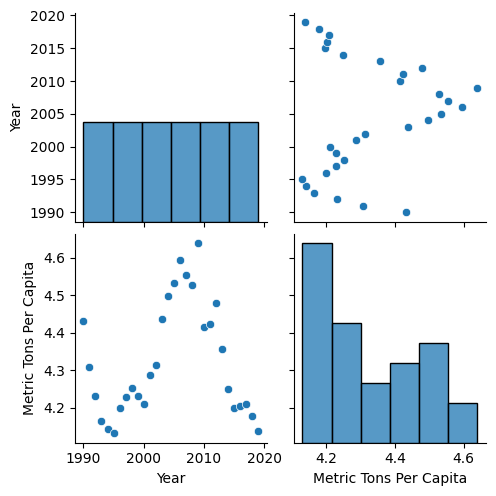

In [16]:
df2 = df.groupby("Year").agg({"Metric Tons Per Capita":"mean"}).reset_index()
sns.pairplot(df2[['Year','Metric Tons Per Capita']])

## Inference

- Over the Years, Co2 Emissions saw a spike during 2000 to 2010 followed by a decline
- Asia ranks first in the overall Co2 Emissions, followed by Americas and then Europe. 

## Predictions

### I will use LSTM Model to predict the futuristic CO2 Emissions of countries

In [17]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.compose import ColumnTransformer


## Data Preprocessing

### I will scale the value of Co2 Emissions. For simplicity, I will only take USA. 

In [18]:
country_data = df[df['Country'] == 'United States']

# Sort by year
country_data = country_data.sort_values(by='Year')

# Select only emissions for the model
emissions = country_data['Kilotons of Co2'].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
emissions_scaled = scaler.fit_transform(emissions.reshape(-1, 1))


In [19]:
def create_sequences(data, time_steps=10):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

# Create sequences
time_steps = 10  # Use last 10 years to predict the next year's emission
x, y = create_sequences(emissions_scaled, time_steps)

In [20]:
train_size = int(0.8 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [21]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5952 - val_loss: 0.0108
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5718 - val_loss: 0.0093
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.5489 - val_loss: 0.0080
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5262 - val_loss: 0.0070
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.5038 - val_loss: 0.0061
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.4819 - val_loss: 0.0054
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4606 - val_loss: 0.0049
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.4399 - val_loss: 0.0047
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4200 - val_loss: 0.0046
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4007 - val_loss: 0.0046
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3820 - val_loss: 0.0049
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3635 - val_loss: 0.0055
Epoch 13/50


### We achieved a Mean Absolute Error of  0.0831  and  val_loss: 0.0601.

### Lets proceed towards predictions

In [22]:
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")

# Predict future emissions
predictions = model.predict(x_test)

# Inverse transform to original scale
predicted_emissions = scaler.inverse_transform(predictions)
actual_emissions = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compare actual vs. predicted
for i in range(3):
    print(f"Actual: {actual_emissions[i][0]}, Predicted: {predicted_emissions[i][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0855
Test Loss: 0.0855
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Actual: 4894500.0, Predicted: 5202401.0
Actual: 4819370.12, Predicted: 5165296.0
Actual: 4975310.06, Predicted: 5124992.5


# Thankyou!